<h1>MNIST</h1>

<p>In this chapter, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Burea. Each image is labeled with the digit it represents. </p>

<p>Scikit-learn provides many helper functions to download popular datasets. MNIST is one of them. </p>

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version = 1)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist["data"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
mnist["target"]

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

<p>There are 70,000 images and each image has 784 features. This is because each image is $28 \times 28$ pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 255 (black). </p> 

<p>We'll look at a digit from the dataset. </p>

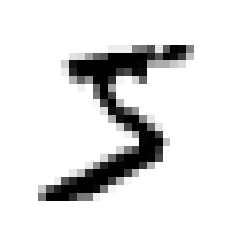

In [7]:
import matplotlib.pyplot as plt

some_digit = X.loc[0]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [8]:
y[0]

'5'

In [9]:
import numpy as np

y = y.astype(np.uint8)

<p>Let's create a test set and set it aside before inspecting the data closely. </p>

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

<h2>Training a Binary Classifier</h2>

<p>Binary classification is the task of classifying the elements of a set into two groups on the basis of a classification rule. </p>

<p>In this example, we'll classify based on whether or not a digit is 5. </p>

<p>We will start off by looking at a Stochastic Gradient Descent (SGD) classifier. </p>

<p>This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time. </p>

In [11]:
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

<p>The classifier guesses the image represents a 5, which we know to be True. </p>

<h2>Performance Measures</h2>

<p>Now, let's look at the model's performance. </p>

<p>Evaluating a classifier is often trickier than evaluating a regressor. </p>

<h3>Cross-validation</h3>

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.loc[train_index]
    y_train_folds = y_train_5.loc[train_index]
    X_test_fold = X_train.loc[test_index]
    y_test_fold = y_train_5.loc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


<p>The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class. At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on the test fold. Then, it counts the number of correct predictions and outputs the ratio of correct predictions. </p>

<p>Next, we will use the cross_val_score() function to evaluate our SGDClassifier model, using K-fold cross-validation with three folds. K-fold cross-validation means splitting the training set into K folds, then making predictions and evlauting them on each fold using a model trained on the remaining folds. </p>

In [13]:
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

<p>It looks like we have above 95% accuracy on all cross-validation folds. Before we get ahead of ourselves, let's look at a classifier which classifies every image in the "not-5" class. </p>

In [14]:
from sklearn.base import BaseEstimator 

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        return self
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [15]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

<p>This seems to have over a 90% accuracy. This is because only about 10% of the images are 5s, so if you always guess an image is not a 5, you'll be right roughly 90% of the time. </p> 

<p>This demonstrates why accuracy is not the preferred measure for classifiers, especially when dealing with skewed datasets. </p>

<h3>Confusion Matrix</h3>

<p>A much better way to evaluate the performance of a classifier is to look at the confusion matrix. </p>

<p>The general idea is to count the number of times instances of class A are classified as class B. </p>

<p>To compute the confusion matrix, you first need to have a set of predictions so thata they can be compared to the actual targets. </p>

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

<p>The cross_val_predict function performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means you get a clean prediction for each instance in the training set. </p>

In [17]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

<p>Each row represents an actual class, while each column represents a predicted class. </p>

<p>Here, the first row considers non-5 images (negative class), where 53,892 of them were correctly classified as non-5s (true negatives), while the remaining 687 were wrong classified as 5s (false positives). </p>

<p>The second row considers the images of 5s (positive class), where 1325 were wrongly classified as non-5s (false negatives), while the remaining 3530 were correctly classified (true positives). </p>

<p>A perfect classifier would have only true positives and true negatives. </p>

In [19]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

<h4>Precision</h4>

<p>The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions, referred to as the precision of the classifier. </p>

$\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$

<h4>Recall</h4>
<p>Precision is typically used along with another metric called recall, also called sensitivity or the true positive rate. This is the ratio of positive instances that are correctly detected by the classifier.</p>

$\text{recall} = \frac{\text{TP}}{\text{TP}+ \text{FN}}$

<h4>Precision and Recall </h4>

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [21]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

<p>Now, our 5-detector doesn't look as effective. </p>

<h4>$\text{F}_{1}$ Score </h4>

<p>It is often convenient to combine precision and recall into a single metric called the $\text{F}_{1}$ score. This is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. </p>

<p>As a result, the classifier will only get a high $\text{F}_{1}$ score if both recall and precision are high.</p>

$\text{F}_{1} = \frac{2}{\frac{1}{\text{precision}}+\frac{1}{\text{recall}}}= \frac{\text{TP}}{\text{TP} + \frac{\text{FN}+\text{FP}}{2}}$

In [22]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

<h4>Precision/Recall Trade-Off</h4>

<p>The $\text{F}_{1}$ score favors classifiers that have similar precision and recall. This is not always what you want. In some contexts you mostly care about precision, in others contexts you care about recall. </p>

<p>Unfortunately, you can't have it both ways. Increasing precision reduces recall, and vice-versa. This is known as the precision/recall trade-off. </p>

<p>To understand this trade-off, we will look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function. If that score is greater than a threshold, then it assigns the instance to the positive class; otherwise, it assigns it to the negative class. </p>

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [24]:
threshold = 0

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

<p>The SGDClassifier uses a threshold equal to 0, so the previous code returns the same result as the predict method. Let's look at raising the threshold.</p>

In [25]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

<p>Here, we see that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses when the threshold is increased to 8000. </p>

<p>We therefore must question: How do we decide which threshold to use? First, use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions. </p>

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

<p>With these scores, we use the precision_recall_curve() function to compute the precision and recall for all possible thresholds. </p>

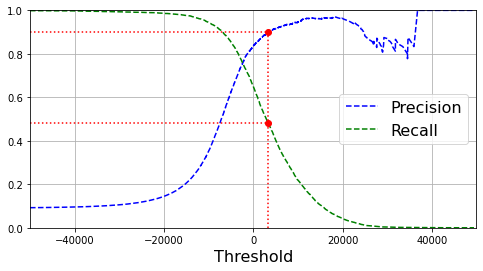

In [27]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
    plt.legend(loc = "center right", fontsize = 16)
    plt.xlabel("Threshold", fontsize = 16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.savefig("precision_recall_vs_threshold_plot")                                              
plt.show()

<p>Here, the precision curve is bumpier than the recall curve, as precision may sometimes go down when you raise the threshold. On the other hand, recall can only go down when the threshold is increased, which explains why its curve looks smooth. </p>

<p>Another way to select a good precision/recall trade-off is to plot precision directly against recall. </p>

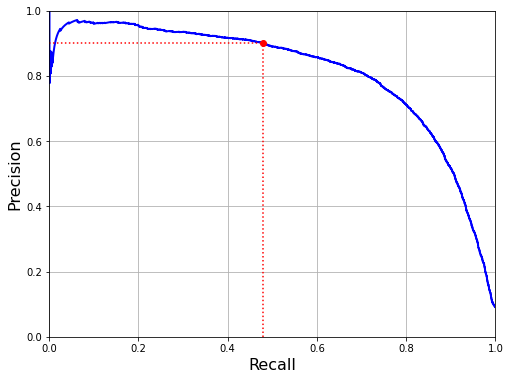

In [28]:

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.savefig("precision_vs_recall_plot")
plt.show()

<p>Here, the precision starts to fall sharply around 80% recall, meaning we would probably want to select a precision/recall trade-off just before that drop. </p>

<p>Suppose for example we want 90% precision. If we look at the first plot, we find that we need to use a threshold of about 8000. To be more precise, we can search for a threshold that gives 90% precision. </p>

In [29]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

y_train_pred_90 = (y_scores >= threshold_90_precision)

In [30]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [31]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

<p>Here, we have found a 90% precision classifier. However, as we can see the recall is very low, which isn't much use. </p>

<h4>The ROC Curve</h4>

<p>The receiver operation characteristic (ROC) curve is another common tool used with binary classification. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate against the false positive rate. </p>

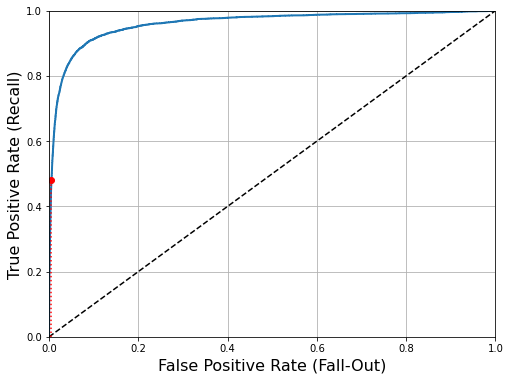

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                     
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
plt.savefig("roc_curve_plot")                                    
plt.show()

<p>Here, we can see the trade-off. The higher the recall (TPR), the more false positives (FPR) the classifier produces. </p>

<p>One way to measure classifiers is the area under the curve (AUC). A perfect classifier will have ROC AUC equal to 1, whereas a purely random classifier will have ROC AUC equal to 0.5. </p>

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

<p>Let's now train a RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier. </p>

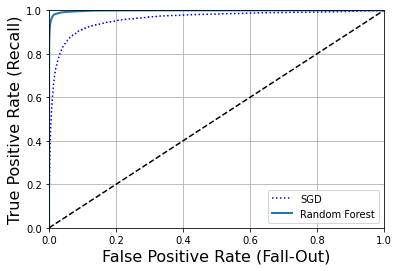

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

<p>As we can see, the Random Forest Classifier is superior to the SGD classifier as the ROC curve is much closer to the top-left corner, with greater AUC. </p>

In [35]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [36]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3)
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

<p>We have a precision of 99%, and a recall of 86.6%. </p>

<h3>Multiclass Classification</h3>

<p>Whereas binary classifiers distinguish between two classes, multiclass classifiers can distinguish between more than two classes. </p>

<p>Some algorithms (such as Logistic Regression classifiers, Random Forest classifiers, and naive Bayes classifiers) are capable of handling multiple classes natively. Others (such as SGD Classifiers or Support Vector Machines) are strictly binary classifiers. </p>

<p>One way to perform multiclass classification with multiple binary classifiers is to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit. Then, when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called one-versus-the-rest (OvR) strategy. </p>

<p>Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called one-versus-one (OvO) strategy. If there are N classes, you need to train $N \times \frac{N - 1}{2}$ classifiers. </p>

<p>For the MNIST problem, this means training 45 binary classifiers. When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish. </p>

<p>Some algorihms (such as Support Vector Machine classifiers) scale poorly with the size of the training set. For these algorithms OvO is preferred because it is faster to train many classifiers on small training sets than to train few classifiers on large training sets. </p>

In [37]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

<p>Here, the code trains the SVC on the training set using the original target classes from 0 to 9 (y_train), instead of the 5-versus-the-rest target classes (y_train_5). </p>

<p>If we call the decision_function() method, we see it returns 10 scores per instance (instead of 1). </p>

In [38]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

<p>The highest score corresponds to class 5:</p>

In [39]:
np.argmax(some_digit_scores)

5

In [40]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [41]:
svm_clf.classes_[5]

5

<p>If you want to force SK Learn to use OvO or OvR, you can use the OneVsOneClassifier or OneVsRestClassifier classes. </p>

In [42]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

ovr_clf.predict([some_digit])

In [45]:
len(ovr_clf.estimators_)

10

In [46]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

<p>Here, SK Learn used the OvR strategy. Since there are 10 classes, it trained 10 binary classifiers. The decision_function() method now returns one value per class. </p>

In [47]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

<p>Here, the classifier is fairly confident about its prediction. Almost all scores are largely negative, bar the 5 class, which as a score of . </p>

<p>Next, let's look at evaluating the classifier. As usual, we can use cross-validation. </p>

In [48]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.87365, 0.85835, 0.8689 ])

<p>This gets over 85% on all test folds. If we use a random classifier, we would get 10% accuracy, so this isn't a bad score! However, we could do better. Scaling the inputs increases accuracy. </p>

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.8983, 0.891 , 0.9018])

<p>This gives us an improved accuracy of at least 89%. </p>

<h3>Error Analysis</h3>

<p>Here, we're going to assume we've found the most optimal model, and look at ways to improve it. One way to do this is to analyse the types of errors it makes. </p>

In [52]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

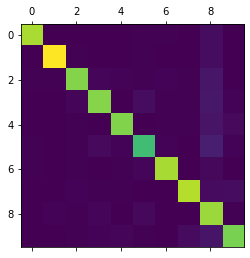

In [53]:
plt.matshow(conf_mx)
plt.show()

<p>This confusion matrix looks decent, since most of the images are on the main diagonal, which means that they were classified correctly. </p>

<p>The 5s look slightly darker than the other digits, which could mean there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as other digits. </p>

<p>Let's focus the plot on the errors. First, we need to divide each value in the confusion matrix by the number of images in the corresponding class so that we can compare error rates instead of absolute numbers of errors. </p>

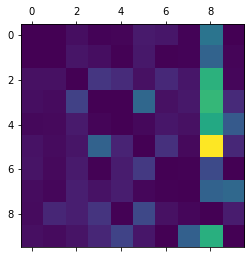

In [55]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx)

<p>We can clearly see that the column for class 8 is quite bright. This tells us that many images get classified as 8s. However, the row for 8 is not that bad, which tells us that actual 8s in general get properly classified as 8s. </p>

<p>We can also see that 3s and 5s are very often confused. </p>

<p>Analysing the confusion matrix often gives good insights into ways to improve our classifier. Looking at this plot, it seems our efforts should be spent on reducing the false 8s. </p>

<p>Analysing individual errors can also be a good way to gain insights on what our classifier is doing wrong and why it is failing. </p>

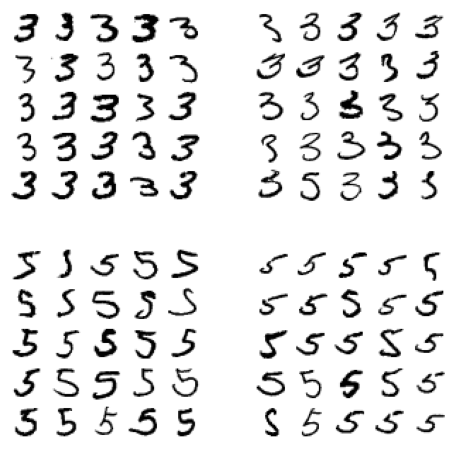

In [63]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")
    
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa.values[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab.values[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba.values[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb.values[:25], images_per_row=5)
plt.savefig("error_analysis_digits_plot")
plt.show()

<p>The two $5 \times 5$ blocks on the left show digits classified as 3s, and the two $5 \times 5$ blocks on the right show images classified as 5s. Some of the digits that the classifier gets wrong are so badly written that even a human would have trouble classifying them. </p>

<p>The reason the classifier made these mistakes is because we used a simple SGDClassifier, which is a linear model. All it does is assign a weight per class to each pixel, and when it sees a new image, it just sums up the weighted pixel intensities to get a score for each class. So, since 3s and 5s only differ by a few pixels, this model would easily confuse them. </p>

<h2>Multilabel Classification </h2>

<p>Until now each instance has always been assigned to just one class. In some cases, we may want our classifier to output multiple classes for each instance. </p>

<p>For example, let's consider a facial recognition classifier. What should it do if it recognises several people in the same picture. It should attach one tag per person it recognises. Say the classifier has been trained to recognise three faces, Alice, Bob and Charlie. Then, when the classifier is shown a picture of Alice and Charlie, it should output [1, 0, 1]. </p>

<p>Such a classification system that ouputs multiple binary tags is called a <em>multilabel classification system. </p>

In [65]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train %2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])

array([[False,  True]])

<p>This prediction is correct, as we know that 5 is not large and odd! </p>

<p>There are many ways to evaluate a multilabel classifier and selecting the right metric really depends on the project. One approach is to measure the $F_{1}$ score for each individual label, then compute the average score. </p>

In [67]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = "macro")

0.976410265560605

<h2>Multioutput Classification</h2>

<p>Multioutput classification is a generalisation of multilabel classification, where each label can be multiclass. </p>

<p>Consider a system that aims to remove noise from images. It takes as input a noisy digit image, and it outputs a clean digital image, represented as an array of pixel intensities, just like the MNIST images. </p>

In [69]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

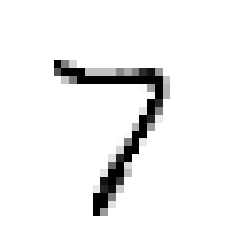

In [76]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.values[some_index]])
plot_digits(clean_digit)